In [761]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [762]:
import numpy as np
import pandas as pd

In [763]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [764]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, asc, desc, between
from pandas.plotting import table

In [765]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [766]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [767]:
# We can view all of the classes that automap found
Base.classes.keys()

[&#39;measurement&#39;, &#39;station&#39;]

In [768]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [769]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [770]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Calculate the date 1 year ago from the last data point in the database
lastdata_point = session.query(func.max(Measurement.date)).all()

# Perform a query to retrieve the data and precipitation scores
date_precips = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
date_precips_df = pd.DataFrame(date_precips, columns=['date','prcp'])
date_precips_df.set_index('date', inplace = True)
date_precips_df.head()


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [771]:
# Sort the dataframe by date
date_precips_df.sort_values(by='date', inplace=True)
date_precips_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


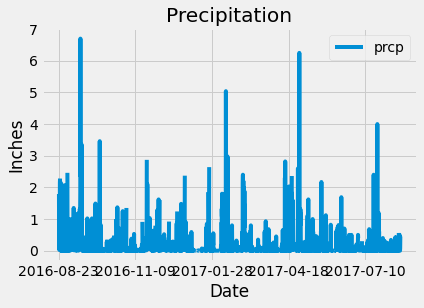

In [772]:
# Use Pandas Plotting with Matplotlib to plot the data
plt_results = date_precips_df.plot()

plt_results.set_xlabel('Date')
plt_results.set_ylabel('Inches')
plt_results.set_title("Precipitation")

plt.savefig("Images/precipitation.png")

#plot
plt.show()

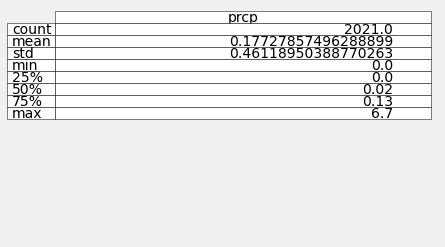

In [773]:
# Use Pandas to print the summary statistics for the precipitation data.
descrip = date_precips_df.describe()
#create a subplot without frame
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, descrip,loc='upper right')

#save the plot as a png file
plt.savefig("Images/describe.png")

In [774]:
# Design a query to show how many stations are available in this dataset?
numof_stations = session.query(Station.station).distinct().count()
numof_stations

9

In [775]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. 
active_stations = (session.query(Measurement.station, func.count    (Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all())

active_df = pd.DataFrame(active_stations, columns=['station','numofstations'])
active_df

,station,numofstations
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [776]:
# Using the station id from the previous query, calculate the lowest temperature recorded,highest temperature recorded, and average temperature of the most active station?

top_station = 'USC00519281'
tempertures = session.query(func.min(Measurement.tobs),
                      func.max(Measurement.tobs),
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == top_station).all()
tempertures

[(54.0, 85.0, 71.66378066378067)]

In [777]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_obs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == top_station).\
    filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-23').all()
date_obs_df = pd.DataFrame(date_obs, columns=['date','tobs'])
date_obs_df.sort_values(by='date', inplace=True)
date_obs_df.set_index('date', inplace=True)
date_obs_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


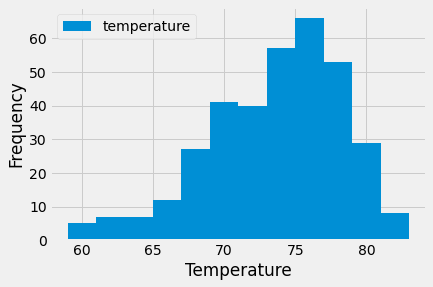

In [778]:
date_obs_df = pd.DataFrame(date_obs, columns = ['date', 'temperature'])

fig, ax = plt.subplots()
date_obs_df.plot.hist(bins = 12, ax = ax)

#labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

#save figure
plt.savefig("Images/yearly_plot.png")
plt.show()